### Customer Acquisition Cost (CAC) Definition:
-   Customer Acquisition Cost (CAC) measures the total marketing spend to acquire one new customer. It's calculated as:
    
        CAC = Total Marketing Speand / Number of New Customers Acquired

-   **Customer Acquisition Cost** measures the efficiency of marketing spend by revealing the cost to acquire each customer. It directly informs profitability (when paired with customer lifetime value), highlights high-performing channels for budget scaling (e.g., low-CAC email campaigns), and flags inefficiencies needing optimization (e.g., overpriced online ads). By tracking CAC, companies allocate resources strategically, avoid unsustainable growth, and ensure their customer acquisition model supports long-term revenue.  



-   We will analyze:

    -   Which marketing channels are most cost-effective.
    -   Relationship between spend and new customers acquired.
    -   Visualize trends and insights.
    -   Calculate CAC per channel.
    -   Recommend best-performing channels.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\emper\OneDrive\Desktop\Customer Acquisition Cost Analysis\cac.csv")

df.head()


,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers
0,CUST0001,Email Marketing,3489.027844,16
1,CUST0002,Online Ads,1107.865808,33
2,CUST0003,Social Media,2576.081025,44
3,CUST0004,Online Ads,3257.567932,32
4,CUST0005,Email Marketing,1108.408185,13


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Marketing_Channel  500 non-null    object 
 2   Marketing_Spend    500 non-null    float64
 3   New_Customers      500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [3]:
# Creating a new column for Customer Acquisition Cost (CAC)
df['CAC'] = df['Marketing_Spend']/ df['New_Customers']
# Creating a new column for Conversion Rate
df['Conversion_Rate'] = df['New_Customers'] / df['Marketing_Spend'] * 100

df.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,CAC,Conversion_Rate
0,CUST0001,Email Marketing,3489.027844,16,218.064240,0.458580
1,CUST0002,Online Ads,1107.865808,33,33.571691,2.978700
2,CUST0003,Social Media,2576.081025,44,58.547296,1.708021
3,CUST0004,Online Ads,3257.567932,32,101.798998,0.982328
4,CUST0005,Email Marketing,1108.408185,13,85.262168,1.172853


### **Customer Acquisition Cost**

-   Now, let's have a look at Average CAC by marketing channel:

In [4]:
df_cac = df.groupby('Marketing_Channel')['CAC'].mean().reset_index()
df_cac = df_cac.sort_values(by='CAC', ascending=False)
df_cac

,Marketing_Channel,CAC
0,Email Marketing,132.913758
3,Social Media,126.181913
1,Online Ads,122.135938
2,Referral,119.892174


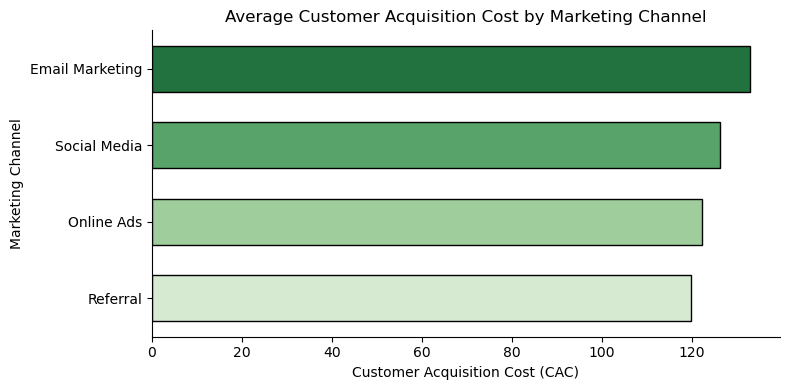

In [5]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_cac,
    y='Marketing_Channel',
    x='CAC',
    palette='Greens_r',
    edgecolor='black',
    width=0.6

)

plt.title('Average Customer Acquisition Cost by Marketing Channel')
plt.ylabel('Marketing Channel')
plt.xlabel('Customer Acquisition Cost (CAC)')

sns.despine()
plt.tight_layout()
plt.show()

*   **Key Insights:**
    - **Email Marketing** has the highest average CAC, indicating it is the most expensive channel per customer acquired.

    - **Social Media** follows closely with a slightly lower CAC compared to Email Marketing.

    - **Online Ads** and **Referral** have significantly lower CACs, making them more cost-effective channels for acquiring customers.

    - Referral stands out as the most efficient channel, with the lowest average CAC among all marketing channels.
_______

-   Now, Let's visualize how much was spent vs how many customers were acquired per campain.

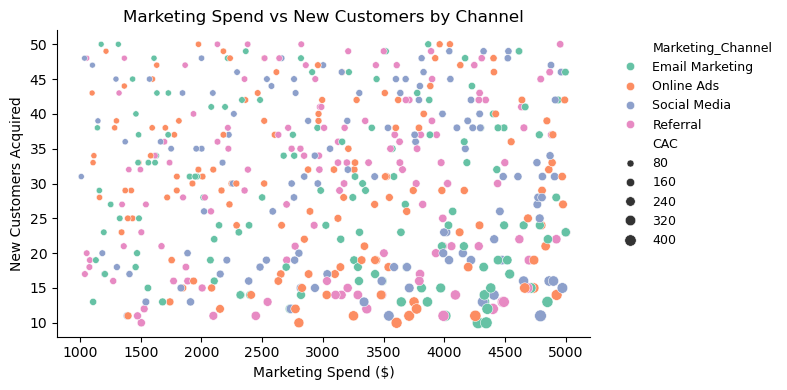

In [8]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df,
    x='Marketing_Spend',
    y='New_Customers',
    hue='Marketing_Channel',
    size='CAC',
    palette='Set2',
)
plt.title('Marketing Spend vs New Customers by Channel')
plt.xlabel('Marketing Spend ($)')
plt.ylabel('New Customers Acquired')
plt.legend(fontsize=9, bbox_to_anchor=(1.03, 1), loc='upper left', frameon=False)


sns.despine()
plt.tight_layout()
plt.show()

- **Email Marketing**: Shows a moderate correlation between marketing spend and new customers acquired. Higher spends generally lead to more customers, but there is some variability.
- **Online Ads**: Displays a relatively strong positive correlation between marketing spend and new customers acquired. As spending increases, the number of new customers tends to increase significantly.
- **Social Media**: Exhibits a moderate relationship between marketing spend and new customers. While higher spends do result in more customers, the trend is less pronounced compared to Online Ads.
- **Referral**: Demonstrates a weaker correlation between marketing spend and new customers acquired. The spread of data points suggests that referral campaigns may not be as directly influenced by marketing spend as other channels.
- **CAC (Customer Acquisition Cost)**: The size of the bubbles indicates CAC, with larger bubbles representing higher costs per customer. Referral has the largest bubbles, suggesting it has the highest CAC among the channels. Email Marketing and Social Media have medium-sized bubbles, while Online Ads shows smaller bubbles, indicating lower CAC.

#### Key Observations:
1. **Efficiency**: Online Ads appears to be the most efficient channel in terms of acquiring new customers per dollar spent, as indicated by its stronger correlation and lower CAC.
2. **Variability**: Referral shows high variability in both marketing spend and new customers acquired, which could indicate inconsistent performance or different campaign strategies.
3. **Cost Efficiency**: Email Marketing and Social Media fall in the middle, balancing cost and acquisition effectiveness. They offer moderate returns on investment.
4. **High CAC**: Referral has the highest CAC, meaning it costs more to acquire each customer compared to other channels.

______

-   Now, let’s have a look at the relationship between new customers acquired and CAC:

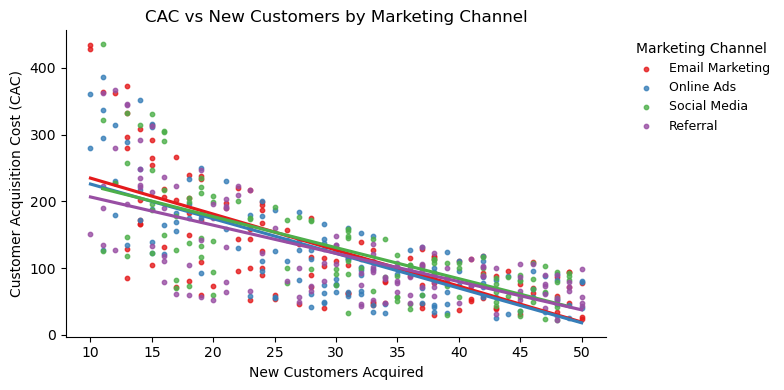

In [9]:
# creating linear regression plots for CAC vs New Customers by Marketing Channel
sns.lmplot(
    data=df,
    x='New_Customers',
    y='CAC',
    hue='Marketing_Channel',
    ci=None,                  
    markers='o',
    scatter_kws={"s": 10},              
    palette='Set1',
    legend=False,
    height=4,
    aspect=2,
)

plt.title("CAC vs New Customers by Marketing Channel")
plt.xlabel('New Customers Acquired')
plt.ylabel('Customer Acquisition Cost (CAC)')
plt.legend(title='Marketing Channel', fontsize=9, bbox_to_anchor=(1.03, 1), loc='upper left', frameon=False)


sns.despine()
plt.tight_layout()
plt.show()

- **Overall Trend**: There is a general **negative correlation** between Customer Acquisition Cost (CAC) and the number of new customers acquired across all marketing channels. As the number of new customers increases, the CAC tends to decrease.
  
- **Channel Performance**:
  - **Email Marketing**: Shows a relatively steep decline in CAC as the number of new customers increases. This suggests that Email Marketing becomes more cost-effective with scale.
  - **Online Ads**: Exhibits a moderate decline in CAC with increasing customer acquisition. It performs reasonably well but not as efficiently as Email Marketing.
  - **Social Media**: Displays a gradual decline in CAC, indicating consistent performance but with less pronounced efficiency gains compared to other channels.
  - **Referral**: Maintains a relatively flat trend with low CAC values even at lower customer acquisition numbers. This suggests that Referral is consistently efficient, regardless of scale.

- **Efficiency Across Channels**:
  - **Referral** stands out as the most efficient channel overall, with consistently low CAC across different customer acquisition levels.
  - **Email Marketing** shows strong scalability, becoming increasingly efficient as it acquires more customers.
  - **Online Ads** and **Social Media** are moderately efficient, with diminishing returns as customer acquisition increases.

#### Key Observations:
1. **Referral Dominance**: Referral consistently has the lowest CAC, making it the most cost-effective channel.
2. **Scalability of Email Marketing**: Email Marketing improves significantly in efficiency as it scales, suggesting it may benefit from larger budgets.
3. **Moderate Efficiency of Online Ads and Social Media**: While these channels are effective, they do not show as much improvement in efficiency with increased customer acquisition compared to Email Marketing.
4. **Potential Optimization Opportunities**: Campaigns with high CAC (outliers) should be reviewed for optimization or reallocation of budget.

___________________

### **Customer Acquisition Cost Distribution:**

-   I will use box plot to see the distribution of CAC by Marketing Channel:

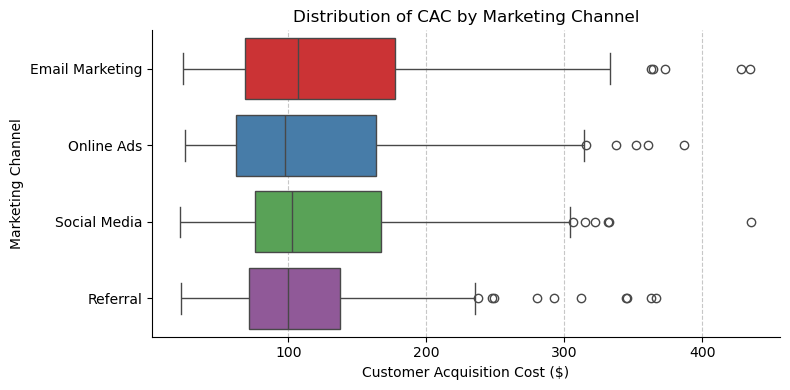

In [13]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df,
    x='CAC', 
    y='Marketing_Channel', 
    palette='Set1'
    )

plt.title('Distribution of CAC by Marketing Channel')
plt.xlabel('Customer Acquisition Cost ($)')
plt.ylabel('Marketing Channel')
plt.grid(axis='x', linestyle='--', alpha=0.7)

sns.despine()
plt.tight_layout()
plt.show()

- **Referral** has the lowest median Customer Acquisition Cost (CAC), indicating it is the most cost-effective channel overall.
- **Social Media** and **Online Ads** have similar median CAC values, with Social Media showing slightly lower variability compared to Online Ads.
- **Email Marketing** has the highest median CAC among all channels, suggesting it is the least cost-effective in terms of acquiring customers.
- **Outliers**: 
  - Email Marketing shows a few high outliers, indicating some campaigns had significantly higher CAC than others.
  - Referral also has a few high outliers, but they are less extreme compared to Email Marketing.
- **Variability**:
  - Referral exhibits the lowest variability in CAC, meaning its performance is more consistent across campaigns.
  - Email Marketing has the highest variability, suggesting inconsistent campaign performance or varying effectiveness.

#### Key Observations:
1. **Efficiency**: Referral consistently outperforms other channels in terms of CAC, making it the most efficient channel.
2. **Consistency**: Referral not only has the lowest median CAC but also the least variability, indicating stable performance.
3. **High-Cost Concerns**: Email Marketing has both the highest median CAC and significant variability, which may warrant further investigation into underperforming campaigns.
4. **Moderate Performance**: Social Media and Online Ads fall in the middle, with moderate CAC values and reasonable consistency.
______________

### **Conversion Rate**

-   Conversion Rate refers to the percentage of potential customers who take a desired action


In [47]:
df_conversion = df.groupby('Marketing_Channel')['Conversion_Rate'].mean().reset_index()
df_conversion = df_conversion.sort_values(by='Conversion_Rate', ascending=False)

df_conversion

,Marketing_Channel,Conversion_Rate
1,Online Ads,1.210954
0,Email Marketing,1.146716
2,Referral,1.144832
3,Social Media,1.135137


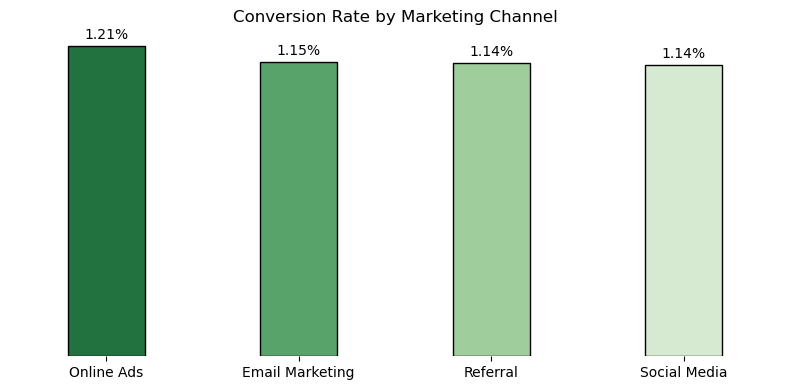

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(
        data=df_conversion,
        x='Marketing_Channel',
        y='Conversion_Rate',
        palette='Greens_r',
        edgecolor='black',
        width=0.4,
        ci=None
)

# Add value labels above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3)


plt.title('Conversion Rate by Marketing Channel')
plt.ylabel(None)
plt.xlabel(None)
ax.tick_params(left=False, labelleft=False)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

- **Online Ads** has the highest conversion rate at **1.21%**, making it the most effective channel in terms of converting marketing spend into new customers.
- **Email Marketing**, **Referral**, and **Social Media** have similar conversion rates, ranging from **1.14% to 1.15%**.
- While Online Ads outperforms the other channels slightly, the differences are relatively small, indicating that all channels are reasonably effective at converting leads into customers.

#### Key Observations:
1. **Channel Performance**:
   - **Online Ads**: Leads with the highest conversion rate, suggesting strong targeting or ad creatives.
   - **Email Marketing, Referral, Social Media**: Perform comparably, showing consistent but slightly lower conversion rates.

2. **Efficiency**:
   - Online Ads demonstrates a slight edge in efficiency, converting more effectively than other channels.
   - The similarity in conversion rates across Email Marketing, Referral, and Social Media suggests these channels may require further optimization to match Online Ads' performance.

3. **Strategic Implications**:
   - **Focus on Online Ads**: Allocate more budget to this channel due to its higher conversion rate.
   - **Optimize Other Channels**: Investigate why Email Marketing, Referral, and Social Media have slightly lower conversion rates and explore ways to improve them.
_________________

### **Break-Even Customers:**

-   Now, We'll calculate the break-even customers for our marketing campaign.

-   What Is Break-Even Customer?
    -   The break-even customers is refer to how many customers do we need to acquire using a specific marketing channel to cover our marketing spend.

In [15]:
df['break_even'] = df['Marketing_Spend'] / df['CAC']

In [42]:
df_break_even = df.groupby('Marketing_Channel')['break_even'].mean().reset_index()
df_break_even = df_break_even.sort_values(by='break_even', ascending=False)

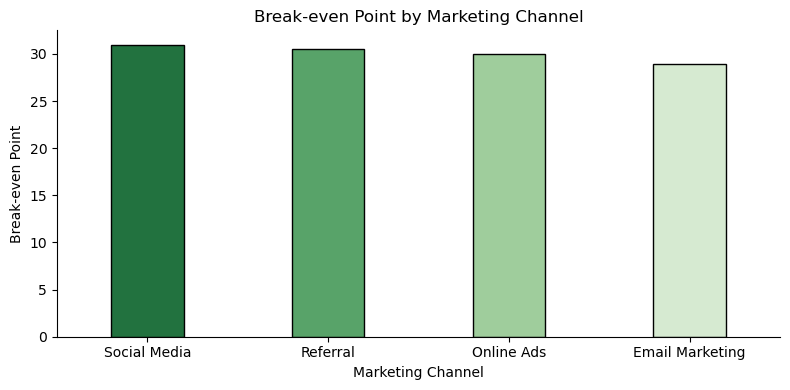

In [45]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_break_even,
    x='Marketing_Channel',
    y='break_even',
    palette='Greens_r',
    edgecolor='black',
    width=0.4,
    ci=None
)

plt.title('Break-even Point by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Break-even Point')
#plt.xticks(rotation=45)


sns.despine()
plt.tight_layout()
plt.show()

- **Social Media** has the highest break-even point at approximately **30 months**, indicating it takes the longest time to recover marketing costs.
- **Referral** follows closely with a break-even point of around **30 months**, showing similar recovery timelines.
- **Online Ads** also has a break-even point of about **30 months**, aligning with Social Media and Referral in terms of recovery duration.
- **Email Marketing** has the lowest break-even point, at roughly **29 months**, making it the fastest channel to reach profitability.

#### Key Observations:
1. **Similar Performance**: Social Media, Referral, and Online Ads have nearly identical break-even points, suggesting comparable efficiency in recovering marketing costs over time.
2. **Faster Recovery**: Email Marketing stands out as the most efficient channel, requiring fewer months to break even compared to other channels.
3. **Consistency Across Channels**: The relatively close break-even points across all channels indicate that none of them are significantly underperforming in terms of long-term cost recovery.
____________

In [ ]:
# Grouping by Marketing Channel to calculate actual and break-even customers
channel_comparison = df.groupby('Marketing_Channel', as_index=False).agg(
    Actual_Customers=('New_Customers', 'sum'),
    Break_Even_Customers=('break_even', 'sum')
)
# Melting the DataFrame for plotting
comparison_melted = channel_comparison.melt(
    id_vars='Marketing_Channel',
    value_vars=['Actual_Customers', 'Break_Even_Customers'],
    var_name='Metric',
    value_name='Customers'
)

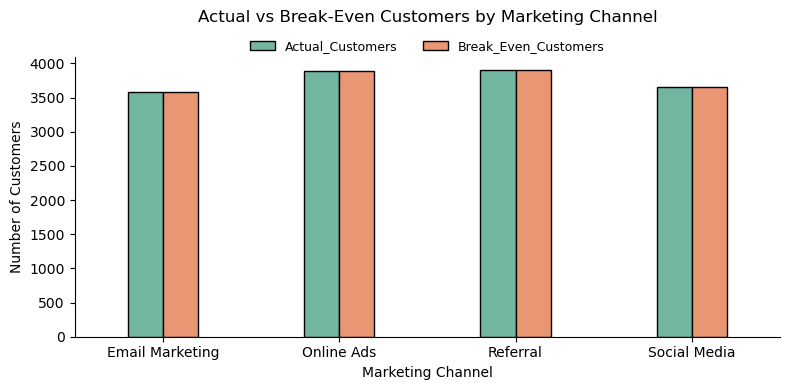

In [41]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=comparison_melted,
    x='Marketing_Channel',
    y='Customers',
    hue='Metric',
    palette='Set2',
    edgecolor='black',
    width=0.4,
)

plt.title('Actual vs Break-Even Customers by Marketing Channel', pad=25)
plt.xlabel('Marketing Channel')
plt.ylabel('Number of Customers')

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=2,
    frameon=False,
    fontsize=9
)

sns.despine()
plt.tight_layout()
plt.show()

- **Online Ads** and **Referral** both have nearly identical performance:
  - Both channels acquired approximately **3,900 actual customers**, which is very close to their respective break-even points.
  - This indicates that these channels are performing efficiently, as they are acquiring customers at or slightly above their break-even thresholds.

- **Email Marketing**:
  - Acquired around **3,500 actual customers**, which is slightly below its break-even point of about **3,600 customers**.
  - This suggests that Email Marketing is marginally underperforming in terms of meeting its break-even target.

- **Social Media**:
  - Also acquired around **3,500 actual customers**, which is slightly below its break-even point of approximately **3,600 customers**.
  - Similar to Email Marketing, Social Media is not quite reaching its break-even threshold, indicating a slight inefficiency.

### Key Observations:
1. **Efficient Channels**: Online Ads and Referral are the most efficient channels, as they consistently meet or exceed their break-even points.
2. **Underperforming Channels**: Email Marketing and Social Media fall slightly short of their break-even targets, suggesting potential areas for optimization.
3. **Consistency Across Channels**: All channels show relatively close alignment between actual customers and break-even customers, indicating consistent performance overall.

____________________________

### **Conclusion:**
Based on the analysis of the Customer Acquisition Cost (CAC), marketing spend, and customer acquisition performance across four marketing channels — **Email Marketing**, **Online Ads**, **Social Media**, and **Referral** — the **Referral** channel emerges as the most cost-effective, consistently delivering the lowest CAC and showing strong efficiency in acquiring customers. **Online Ads** performs well in terms of conversion rate and scalability, making it a strong contender for budget allocation. **Email Marketing** has the highest average CAC and slightly underperforms relative to its break-even point, indicating a need for optimization in targeting or messaging. **Social Media** shows moderate efficiency, with room for improvement through better audience segmentation or content strategy.